# Exercise 4

This coding exercise involves checking the convexity of a piecewise affine function.

In [1]:
# Don't import any other packages
import numpy as np
import matplotlib.pyplot as plt

# random seed fix, do not change this
np.random.seed(0)

### Variable Initialization

Consider the interval $ [0, 100] $ and set $ f(0) = 0 $. We take a total of 1000 instances (denoted by *samples* variable) of $ f $ with $ n = 4 $ (denoted by *patches* variable). Each instance is given by a row in the numpy array named *slopes_array*. The row has length $ n + 1 $ and its $ i^{\mathrm{th}} $ element corresponds to the slope $ m_{i+1} $ of piecewise affine function in the interval $ (t_i, t_{i+1}) $. We will test the convexity of these functions.

In [2]:
samples = 100
patches = 5

# Create an array of slopes to be checked
slopes_array = np.random.randint(-2,2, size=(samples, patches))

# List of patches+1 breakpoints with a = 0 and b = 100.
breakpoints = np.linspace(0, 20, patches+1)

### Piecewise-linear function
Given breakpoints and slopes, we define a piecewise linear function.

In [3]:
def piecewise_linear(x, breakpoints, slopes, patches):
    N=patches+1
    yim1=0
    for i in range(1,N):
        if breakpoints[i-1] <= x <= breakpoints[i]:
            y = slopes[i-1] * (x - breakpoints[i-1]) + yim1 
            return y
        yim1 += slopes[i-1] * (breakpoints[i] - breakpoints[i-1])
        
    return yim1

### Test for Convexity

You are required to implement a python function named *check_convexity* which takes two numpy arrays: *slopes* and *breakpoints*:
* *slopes* has length *patches* (or ) and corresponds to the list of slopes $ m_1, \ldots, m_n $ for a piecewise affine function.
* *breakpoints* has length *patches* + 1 (or $n + 1$) and corresponds to the list of breakpoints $ t_0, \ldots, t_n $.
The python function should return *True* if the given piecewise affine function is convex. Otherwise, it should return *False*.

#### Task - Complete the code below (5 points)

In [4]:
def check_convexity(slopes, breakpoints):
    for i in range(len(slopes) - 1):
        if slopes[i] > slopes[i + 1]:
            return False
    return True

### Testing your Implementation

In [5]:
def testing(slopes_array, breakpoints):
    
    count = 0
    
    
    
    for slopes in slopes_array:
        if check_convexity(slopes, breakpoints):
            count += 1
           
    return count

print('Number of convex functions: ', testing(slopes_array, breakpoints))

Number of convex functions:  3


### Plot convex functions you have found

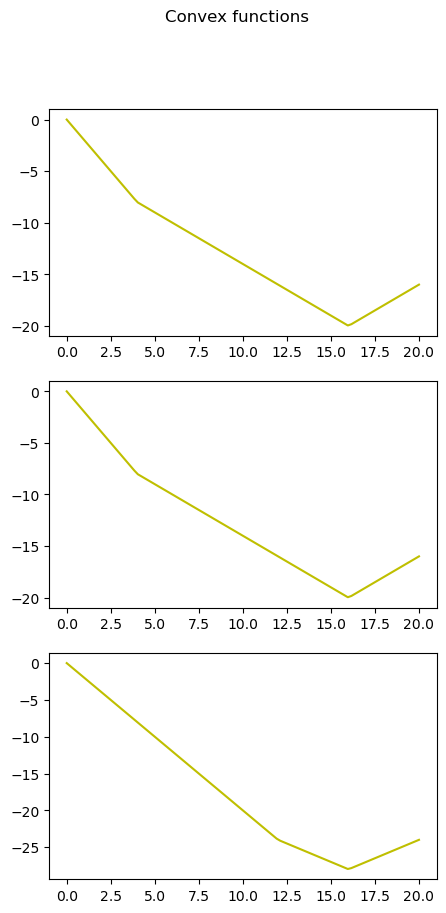

In [6]:
Number = testing(slopes_array, breakpoints)
fig, ax = plt.subplots(Number,figsize=(5, 10))
fig.suptitle('Convex functions')
x = np.linspace(0,20,100)
i=0
for slopes in slopes_array:
        if check_convexity(slopes, breakpoints):
            y = [piecewise_linear(s, breakpoints, slopes, patches) for s in x]
            ax[i].plot(x, y,color='y')
            #ax[i].axis('equal')
            i += 1

### Plot several non-convex functions you've found

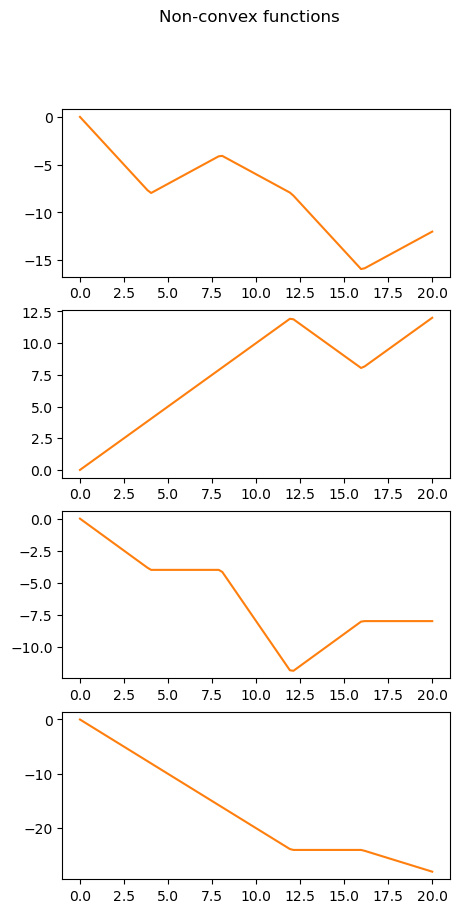

In [7]:
M = 4 # number of non-convex functions you want to plot
fig, ax = plt.subplots(M,figsize=(5, 10))
fig.suptitle('Non-convex functions')
x = np.linspace(0,20,100)
j = 0
for slopes in slopes_array:
        if check_convexity(slopes, breakpoints):
            continue
        elif j < M:
            y  = [piecewise_linear(s, breakpoints, slopes, patches) for s in x]
            ax[j].plot(x, y,'tab:orange')
            #ax[j].axis('equal')
            j += 1